In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('insurance.csv')

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [7]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [8]:
for column in df:
    if df[column].duplicated().empty:
        print(f"{df[column]} ")
else:
    print("The df has no duplicate value")

The df has no duplicate value


## EDA

#### Gender

In [9]:
x= df['sex'].value_counts()
x

sex
male      676
female    662
Name: count, dtype: int64

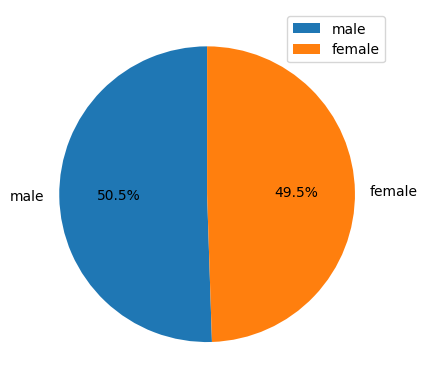

In [10]:
ax = x.plot(kind='pie', autopct='%1.1f%%',startangle = 90, legend=True )
plt.ylabel("")
plt.show()

#### Gender wise Charges

In [11]:
x= df.groupby("sex")['charges'].sum()
x

sex
female    8.321061e+06
male      9.434764e+06
Name: charges, dtype: float64

Text(0, 0.5, 'Charges')

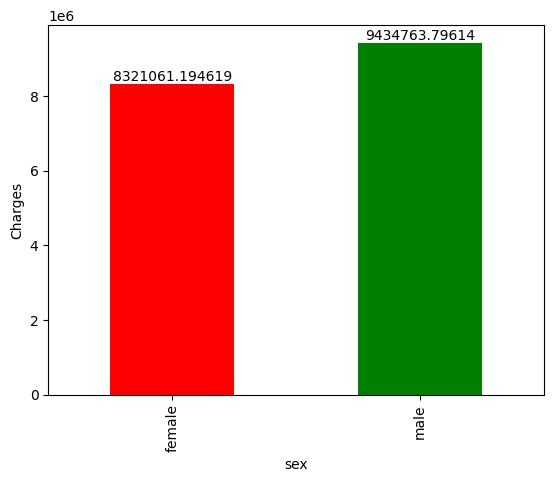

In [12]:
ax = x.plot(kind = 'bar', color = ['red', 'green'] )
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')
plt.ylabel('Charges')


#### Age wise Charges

In [13]:
x = df.groupby('age')['charges'].mean()
x

age
18     7086.217556
19     9747.909335
20    10159.697736
21     4730.464330
22    10012.932802
23    12419.820040
24    10648.015962
25     9838.365311
26     6133.825309
27    12184.701721
28     9069.187564
29    10430.158727
30    12719.110358
31    10196.980573
32     9220.300291
33    12351.532987
34    11613.528121
35    11307.182031
36    12204.476138
37    18019.911877
38     8102.733674
39    11778.242945
40    11772.251310
41     9653.745650
42    13061.038669
43    19267.278653
44    15859.396587
45    14830.199856
46    14342.590639
47    17653.999593
48    14632.500445
49    12696.006264
50    15663.003301
51    15682.255867
52    18256.269719
53    16020.930755
54    18758.546475
55    16164.545488
56    15025.515837
57    16447.185250
58    13878.928112
59    18895.869532
60    21979.418507
61    22024.457609
62    19163.856573
63    19884.998461
64    23275.530837
Name: charges, dtype: float64

Text(0, 0.5, 'Charges')

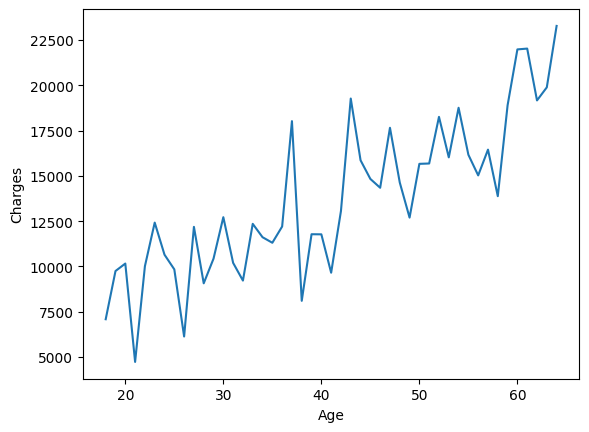

In [14]:
x.plot(kind = 'line')
plt.xlabel('Age')
plt.ylabel("Charges")

#### Region

In [15]:
x = df['region'].value_counts()
x

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

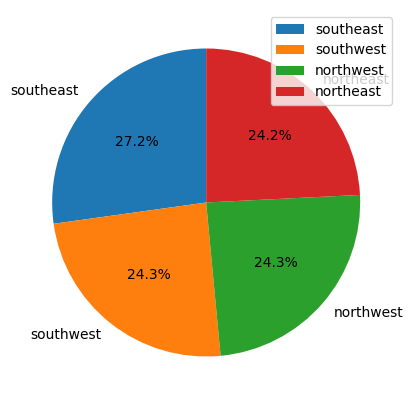

In [16]:
x.plot(kind='pie', autopct='%1.1f%%',startangle = 90, legend=True, figsize =(5,5) )
plt.ylabel("")
plt.show()

#### Smoker

In [17]:
x = df['smoker'].value_counts()
x

smoker
no     1064
yes     274
Name: count, dtype: int64

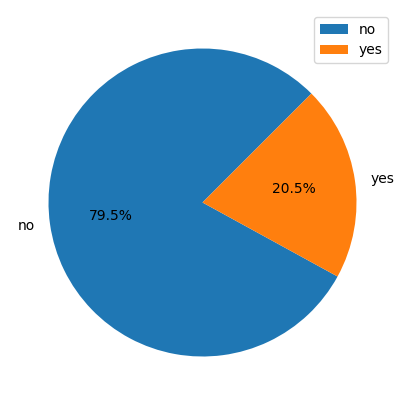

In [18]:
x.plot(kind='pie', autopct='%1.1f%%',startangle =45, legend=True, figsize =(5,5) )
plt.ylabel("")
plt.show()

#### Age wise Smoker

In [19]:
x = df.groupby('age')['smoker'].count()
x

age
18    69
19    68
20    29
21    28
22    28
23    28
24    28
25    28
26    28
27    28
28    28
29    27
30    27
31    27
32    26
33    26
34    26
35    25
36    25
37    25
38    25
39    25
40    27
41    27
42    27
43    27
44    27
45    29
46    29
47    29
48    29
49    28
50    29
51    29
52    29
53    28
54    28
55    26
56    26
57    26
58    25
59    25
60    23
61    23
62    23
63    23
64    22
Name: smoker, dtype: int64

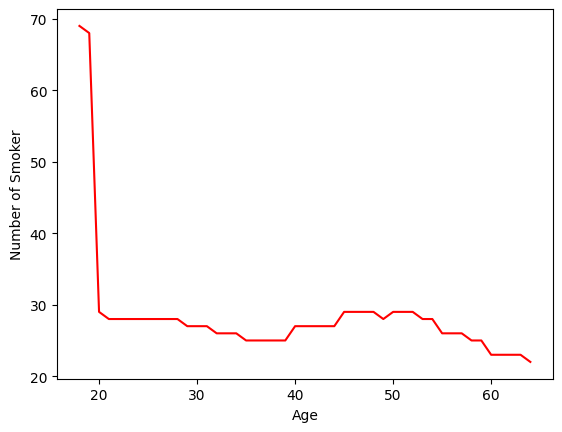

In [20]:
x.plot(kind = 'line', color = "Red")
plt.xlabel("Age")
plt.ylabel("Number of Smoker")
plt.title = "Smoker"
plt.show()

#### Age wise bmi

In [21]:
x = df.groupby('age')['bmi'].mean()
x

age
18    31.326159
19    28.596912
20    30.632759
21    28.185714
22    31.087679
23    31.454464
24    29.142679
25    29.693929
26    29.428929
27    29.333571
28    29.482143
29    29.383148
30    30.557593
31    29.918333
32    31.597692
33    31.163077
34    30.274038
35    31.394800
36    29.374200
37    31.216600
38    28.996600
39    29.910200
40    30.139074
41    31.506852
42    30.328148
43    30.204444
44    30.844259
45    29.778966
46    31.340862
47    30.664310
48    31.925690
49    30.313929
50    31.132241
51    31.727069
52    32.936034
53    30.360893
54    31.234286
55    31.950000
56    31.600962
57    30.844423
58    32.718200
59    30.572000
60    30.332826
61    32.548261
62    32.342609
63    31.923478
64    32.976136
Name: bmi, dtype: float64

Text(0, 0.5, 'Avarage Bmi')

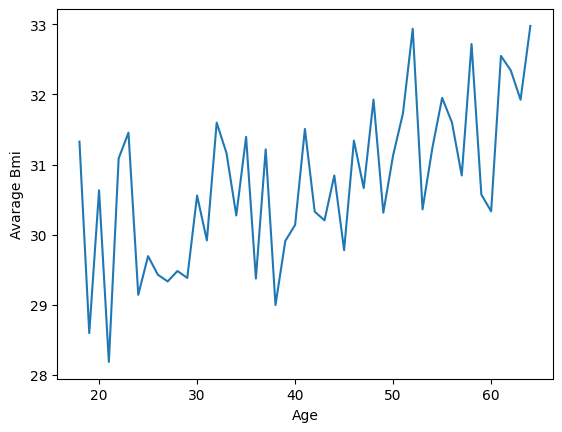

In [22]:
x.plot(kind = 'line')
plt.xlabel('Age')
plt.ylabel("Avarage Bmi")

#### Gender wise Smoker

In [23]:
x = df.groupby('sex')['smoker'].count()
x

sex
female    662
male      676
Name: smoker, dtype: int64

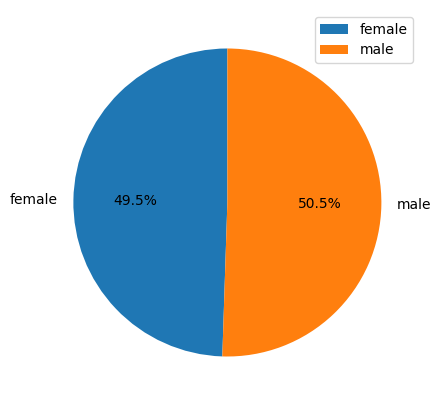

In [26]:
x.plot(kind='pie', autopct='%1.1f%%',startangle =90, legend=True, figsize =(5,5) )
plt.ylabel("")
plt.show()

#### Count of Gender in each region

In [31]:
x = df.groupby('sex')['region'].value_counts()
x

sex     region   
female  southeast    175
        northwest    164
        southwest    162
        northeast    161
male    southeast    189
        northeast    163
        southwest    163
        northwest    161
Name: count, dtype: int64

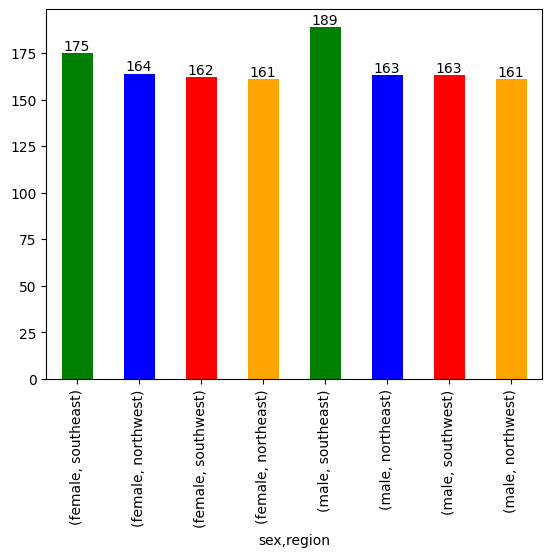

In [34]:
ax = x.plot(kind = 'bar', color={'red', 'green', 'orange', 'blue'})
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')